In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Reading and preprocessing data

In [2]:
#Loading data
books = pd.read_csv('BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [3]:
#checking shapes of the datasets
print (books.shape)
print (users.shape)
print (ratings.shape)

(271379, 8)
(278858, 3)
(1149780, 3)


In [4]:
#Exploring books dataseta
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [6]:
#Now the books datasets looks like....
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [7]:
#checking data types of columns
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

In [8]:
#making this setting to display full text in columns
pd.set_option('display.max_colwidth', None)

In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [10]:
#yearOfPublication should be set as having dtype as int
#checking the unique values of yearOfPublication
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [11]:
#Correcting the dtypes of yearOfPublication
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

In [12]:
print (sorted(books['yearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [13]:
#The value 0 is invalid and as this dataset was published in 2020, set the years after 2020 to be invalid
#setting invalid years as NaN
books.loc[(books.yearOfPublication > 2020) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [14]:
#replacing NaNs with mean value of yearOfPublication
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [15]:
#rechecking - no NANs
books.yearOfPublication.isnull().sum()

0

In [16]:
#resetting the dtype as int32
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

In [17]:
#exploring 'publisher' column
books.loc[books.publisher.isnull(),:]
# two NANs

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [18]:
#investigating rows having NaNs
#Checking with rows having bookTitle as Tyrant Moon to see if we can get any concusion
books.loc[(books.bookTitle == 'Tyrant Moon'),:]
#no concusions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [19]:
#Checking rows having bookTitle as Finder Keepers to see if we can get any conclusion
books.loc[(books.bookTitle == 'Finders Keepers'),:]
#all rows with different publisher and bookAuthor

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
10800,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42020,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58267,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66681,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134315,0156309505,Finders Keepers,Will,1989,Voyager Books
173482,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195896,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211886,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [20]:
#checking by bookAuthor to find patterns
books.loc[(books.bookAuthor == 'Elaine Corvidae'),:]
#all having different publisher...no conclusions here

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
126768,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129007,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory


In [21]:
#checking by bookAuthor to find patterns
books.loc[(books.bookAuthor == 'Linnea Sinclair'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [22]:
#since there is nothing in common to infer publisher for NaNs, replacing these with 'other
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

In [23]:
# label encoding - title, author, publisher
# changed - only publisher and book author encoded
label_encoder = LabelEncoder()
#books['bookTitleCoded'] = label_encoder.fit_transform(books["bookTitle"].astype(np.str)).astype(np.int64)
books['bookAuthorCoded'] = label_encoder.fit_transform(books["bookAuthor"].astype(np.str)).astype(np.int64)
books['publisherCoded'] = label_encoder.fit_transform(books["publisher"].astype(np.str)).astype(np.int64)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookAuthorCoded,publisherCoded
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,65205,10974
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,81485,6667
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,12668,6670
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,34303,5292
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,25092,15845


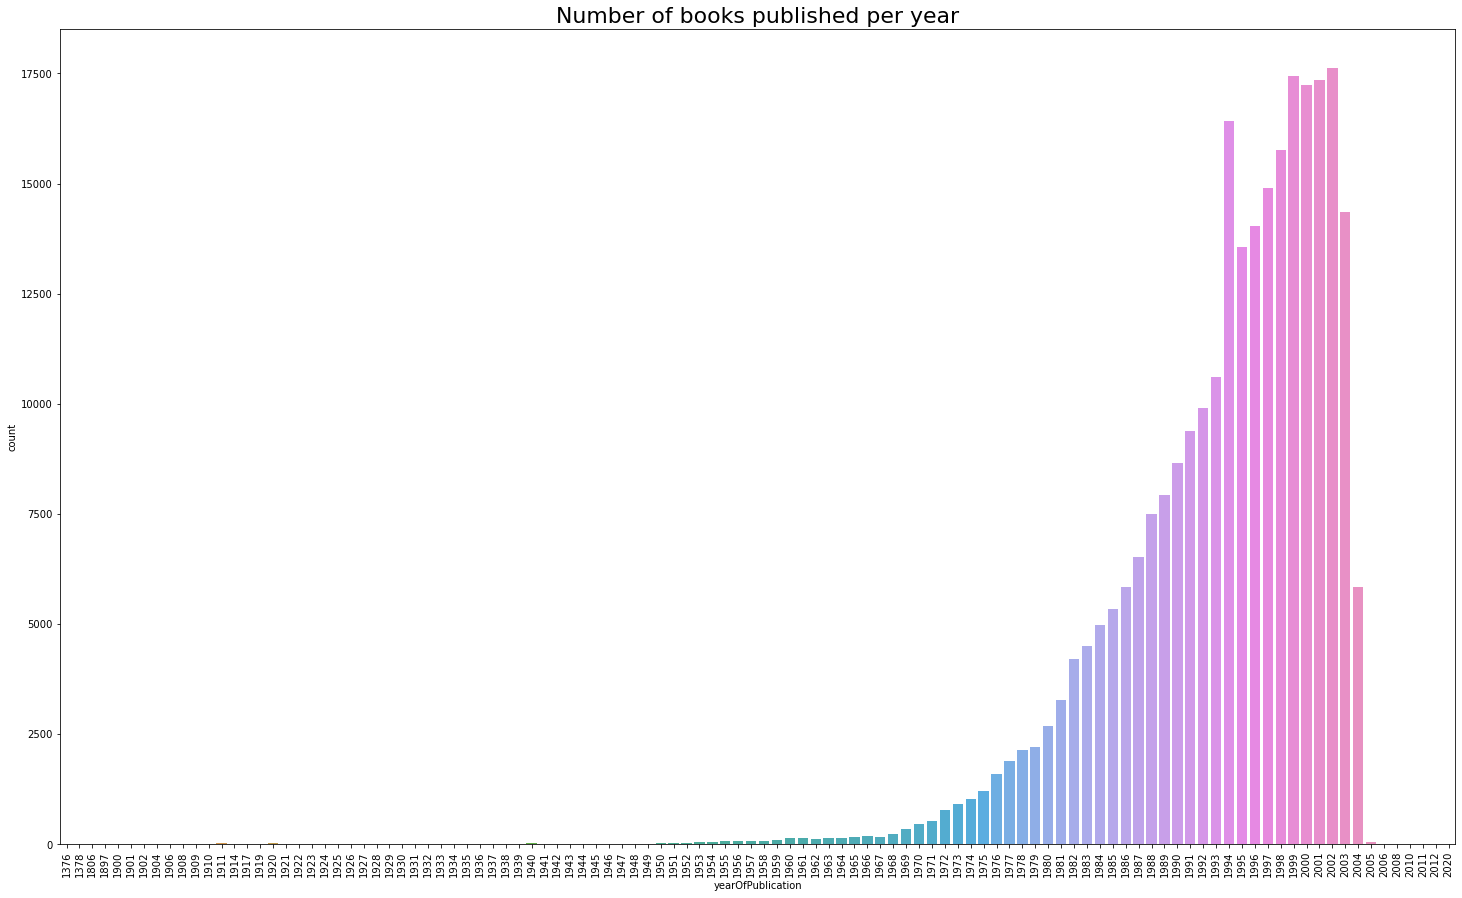

In [24]:
sns.countplot(data=books , x='yearOfPublication', ax=plt.subplots(figsize=(25,15))[1])
plt.xticks(rotation = 90)
plt.title("Number of books published per year", size=22)
plt.show()

In [25]:
books.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookAuthorCoded,publisherCoded
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,65205,10974
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,81485,6667
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,12668,6670
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,34303,5292
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,25092,15845


In [26]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [27]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [28]:
users.userID.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [29]:
print (sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [30]:
#Age column has some invalid entries like nan, 0 and very high values like 100 and above
#Values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [31]:
#replacing NaNs with mean
users.Age = users.Age.fillna(users.Age.mean())

In [32]:
#setting the data type as int
users.Age = users.Age.astype(np.int32)

In [33]:
#rechecking
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


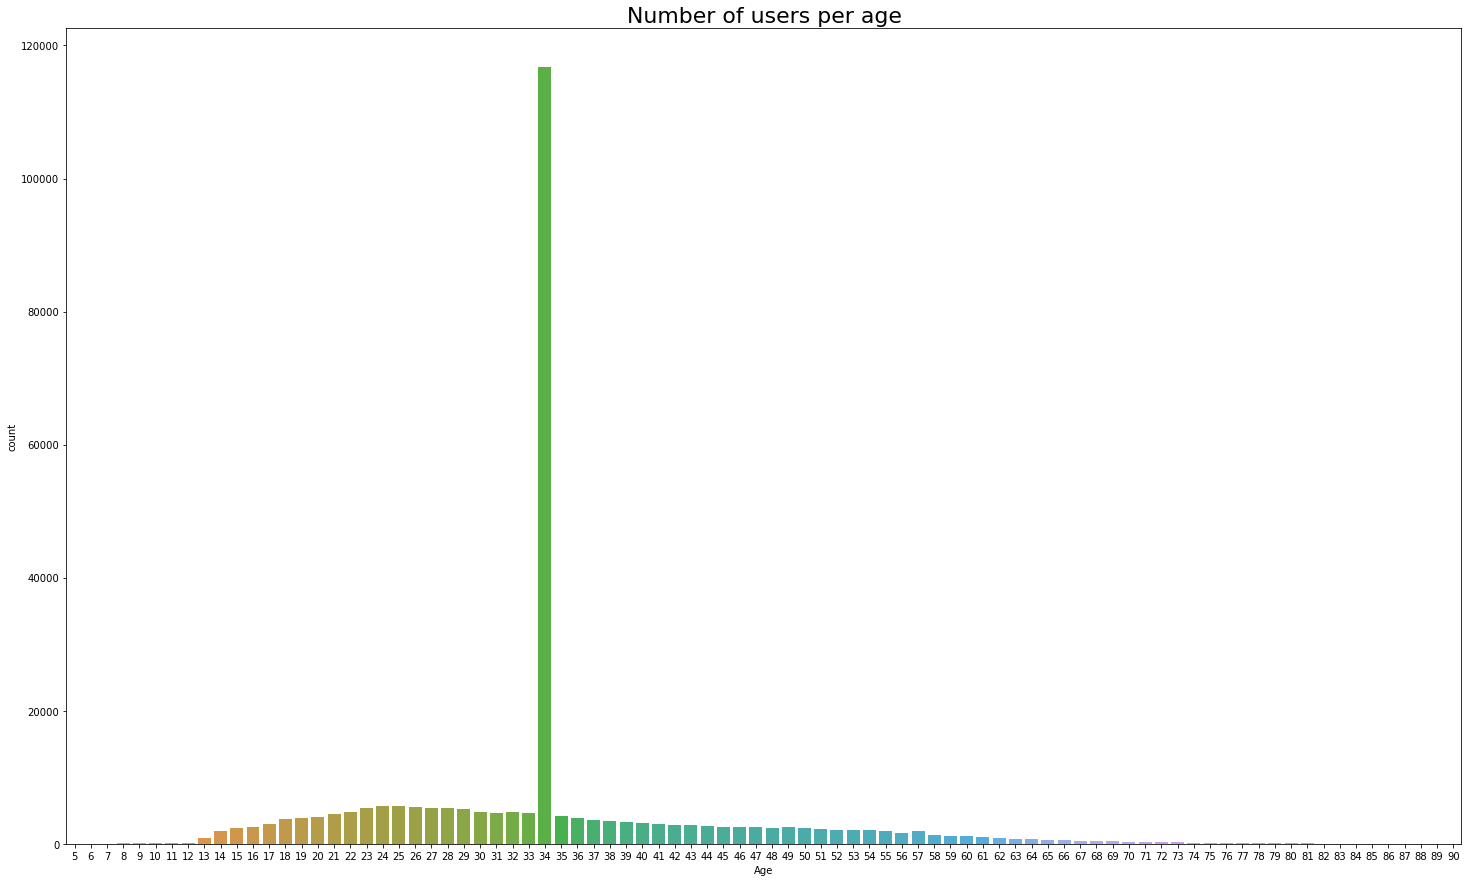

In [34]:
sns.countplot(data=users , x='Age', ax=plt.subplots(figsize=(25,15))[1])
#plt.xticks(rotation = 90)
plt.title("Number of users per age", size=22)
plt.show()

In [35]:
print (users.Location.unique())

['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


In [36]:
np.array(users.Location)

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'brampton, ontario, canada', 'knoxville, tennessee, usa',
       'dublin, n/a, ireland'], dtype=object)

In [37]:
for i in range (0, users.Location.size): 

    location = users.Location[i].split(', ')
    
    users.loc[(users.index == i), 'City'] = location[0]
    users.loc[(users.index == i), 'Province/State'] = location[1]
    users.loc[(users.index == i), 'Country'] = location[2]

In [40]:
users.tail()

,userID,Location,Age,City,Province/State,Country
278853,278854,"portland, oregon, usa",34,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",34,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",34,knoxville,tennessee,usa
278857,278858,"dublin, n/a, ireland",34,dublin,n/a,ireland


In [41]:
#exploring 'city' column 
users.loc[users.City == '', : ]

,userID,Location,Age,City,Province/State,Country


In [42]:
users.loc[(users.City == ''), 'City'] = "Unknown city"

In [43]:
#exploring 'province' column 
users.loc[users[[col for col in users.columns if 'Province/State' in col][0]] =='' , :]

,userID,Location,Age,City,Province/State,Country
18,19,"weston, ,",14,weston,,
90,91,"toronto/newmarket, ,",34,toronto/newmarket,,
557,558,"burnaby, ,",34,burnaby,,
776,777,"portland, ,",13,portland,,
788,789,"pepperell, ,",15,pepperell,,
...,...,...,...,...,...,...
278438,278439,"brescia, ,",24,brescia,,
278523,278524,"kansas city, ,",10,kansas city,,
278568,278569,"ann arbor, ,",34,ann arbor,,
278624,278625,"savona, ,",36,savona,,


In [44]:
users.columns= ['userID', 'Location', 'Age', 'City', 'Province', 'Country']
users.head()

#users.loc[(users[[col for col in users.columns if 'Province/State' in col][0]] == ''), users[[col for col in users.columns if 'Province/State' in col][0]]] = "Unknown province"

,userID,Location,Age,City,Province,Country
0,1,"nyc, new york, usa",34,nyc,new york,usa
1,2,"stockton, california, usa",18,stockton,california,usa
2,3,"moscow, yukon territory, russia",34,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",34,farnborough,hants,united kingdom


In [45]:
users.loc[users.Province == '', : ]

,userID,Location,Age,City,Province,Country
18,19,"weston, ,",14,weston,,
90,91,"toronto/newmarket, ,",34,toronto/newmarket,,
557,558,"burnaby, ,",34,burnaby,,
776,777,"portland, ,",13,portland,,
788,789,"pepperell, ,",15,pepperell,,
...,...,...,...,...,...,...
278438,278439,"brescia, ,",24,brescia,,
278523,278524,"kansas city, ,",10,kansas city,,
278568,278569,"ann arbor, ,",34,ann arbor,,
278624,278625,"savona, ,",36,savona,,


In [46]:
users.loc[(users.Province == ''), 'Province'] = "Unknown province"

In [47]:
users.loc[users.Country == '', : ]

,userID,Location,Age,City,Province,Country
18,19,"weston, ,",14,weston,Unknown province,
90,91,"toronto/newmarket, ,",34,toronto/newmarket,Unknown province,
311,312,"lk, jlk,",34,lk,jlk,
317,318,"berlin, n/a,",34,berlin,n/a,
536,537,"davis, california,",34,davis,california,
...,...,...,...,...,...,...
278624,278625,"savona, ,",36,savona,Unknown province,
278651,278652,"murrieta, ,",34,murrieta,Unknown province,
278697,278698,"pasadena, maryland,",34,pasadena,maryland,
278716,278717,"mayagüez, puerto rico,",53,mayagüez,puerto rico,


In [48]:
users.loc[(users.Country == ''), 'Country'] = "Unknown country"

In [49]:
# rechecking
users.loc[users.City == '', : ]

,userID,Location,Age,City,Province,Country


In [50]:
users.loc[users.Province == '', : ]

,userID,Location,Age,City,Province,Country


In [51]:
users.loc[users.Country == '', : ]

,userID,Location,Age,City,Province,Country


In [52]:
users.head()

,userID,Location,Age,City,Province,Country
0,1,"nyc, new york, usa",34,nyc,new york,usa
1,2,"stockton, california, usa",18,stockton,california,usa
2,3,"moscow, yukon territory, russia",34,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",34,farnborough,hants,united kingdom


In [53]:
#checking first few rows...
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [54]:
ratings.shape

(1149780, 3)

In [55]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [56]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [57]:
print (ratings.shape)
print (ratings_new.shape)
#it can be seen that many rows having book ISBN not part of books dataset got dropped off

(1149780, 3)
(1031175, 3)


In [58]:
#ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset
ratings = ratings[ratings.userID.isin(users.userID)]

In [59]:
print(ratings.shape)
print(ratings_new.shape)
#no new users added, hence we will go with above dataset ratings_new (1031175, 3)

(1149780, 3)
(1031175, 3)


In [60]:
#ratings dataset will have n_users*n_books entries if every user rated every item, this shows that the dataset is very sparse
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75676205182


In [61]:
print("number of users: " + str(n_users))
print("number of books: " + str(n_books))

number of users: 278858
number of books: 271379


In [62]:
#Sparsity of dataset in %
sparsity=1.0-len(ratings_new)/float(n_users*n_books)
print('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99863738542713 %


In [63]:
#BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 
#higher values denoting higher appreciation, or implicit, expressed by 0
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [64]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [65]:
#checking shapes
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031175, 3)
(383852, 3)
(647323, 3)


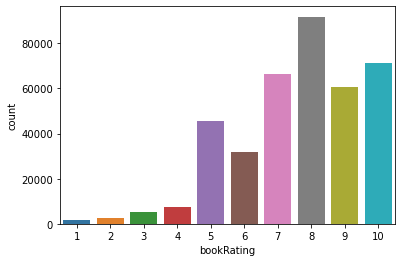

In [66]:
#plotting count of bookRating
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [67]:
# JUST AN INTERESTING THING

#At this point , a simple popularity based recommendation system can be built based on count of user ratings for different books
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending = False).head(10)
print("Following books are recommended")
top10.merge(books, left_index = True, right_on = 'ISBN')

Following books are recommended


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookAuthorCoded,publisherCoded
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",2503,8838
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,18762,4298
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,4330,11612
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books,40577,1011
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,92248,11391
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far,81325,14951
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,80856,11478
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books,9719,15933
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,96825,11752
118,2179,0671027360,Angels & Demons,Dan Brown,2001,Pocket Star,18762,11776


In [68]:
#Similarly segregating users who have given explicit ratings from 1-10 and those whose implicit behavior was tracked
users_exp_ratings = users[users.userID.isin(ratings_explicit.userID)]
users_imp_ratings = users[users.userID.isin(ratings_implicit.userID)]

In [69]:
#checking shapes
print(users.shape)
print(users_exp_ratings.shape)
print(users_imp_ratings.shape)

(278858, 6)
(68092, 6)
(52452, 6)


In [70]:
#To cope up with computing power we have and to reduce the dataset size, we are considering users who have rated atleast 100 books
#and books which have atleast 100 ratings
counts1 = ratings_explicit['userID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >= 100].index)]

In [71]:
#Merging tables from different files to include all the collumns we need 
df = ratings_count.merge(books, left_index = True, right_on = 'ISBN')
df = df.merge(ratings_explicit, how='inner', left_on='ISBN', right_on='ISBN')
df = df.merge(users_exp_ratings, how='inner', left_on='userID', right_on='userID')

df['ISBNCoded'] = label_encoder.fit_transform(df["ISBN"].astype(np.str)).astype(np.int64)
df['CityCoded'] = label_encoder.fit_transform(df["City"].astype(np.str)).astype(np.int64)
df['ProvinceCoded'] = label_encoder.fit_transform(df["Province"].astype(np.str)).astype(np.int64)
df['CountryCoded'] = label_encoder.fit_transform(df["Country"].astype(np.str)).astype(np.int64)

df['bookRating'] = df['bookRating_x']

df.drop(['bookRating_x', 'ISBN', 'bookTitle', 'bookAuthor', 'publisher', 'bookRating_y', 'Location', 'City', 'Province', 'Country'], axis=1, inplace=True)


df.head()

,yearOfPublication,bookAuthorCoded,publisherCoded,userID,Age,ISBNCoded,CityCoded,ProvinceCoded,CountryCoded,bookRating
0,1967,11914,13713,171118,47,0,323,62,4,8
1,1994,66753,5432,171118,47,152,323,62,4,7
2,1992,16910,3227,171118,47,236,323,62,4,17
3,1993,98538,13381,171118,47,237,323,62,4,7
4,1988,64785,13735,171118,47,282,323,62,4,62


In [72]:
df.dtypes

yearOfPublication    int32
bookAuthorCoded      int64
publisherCoded       int64
userID               int64
Age                  int32
ISBNCoded            int64
CityCoded            int64
ProvinceCoded        int64
CountryCoded         int64
bookRating           int64
dtype: object

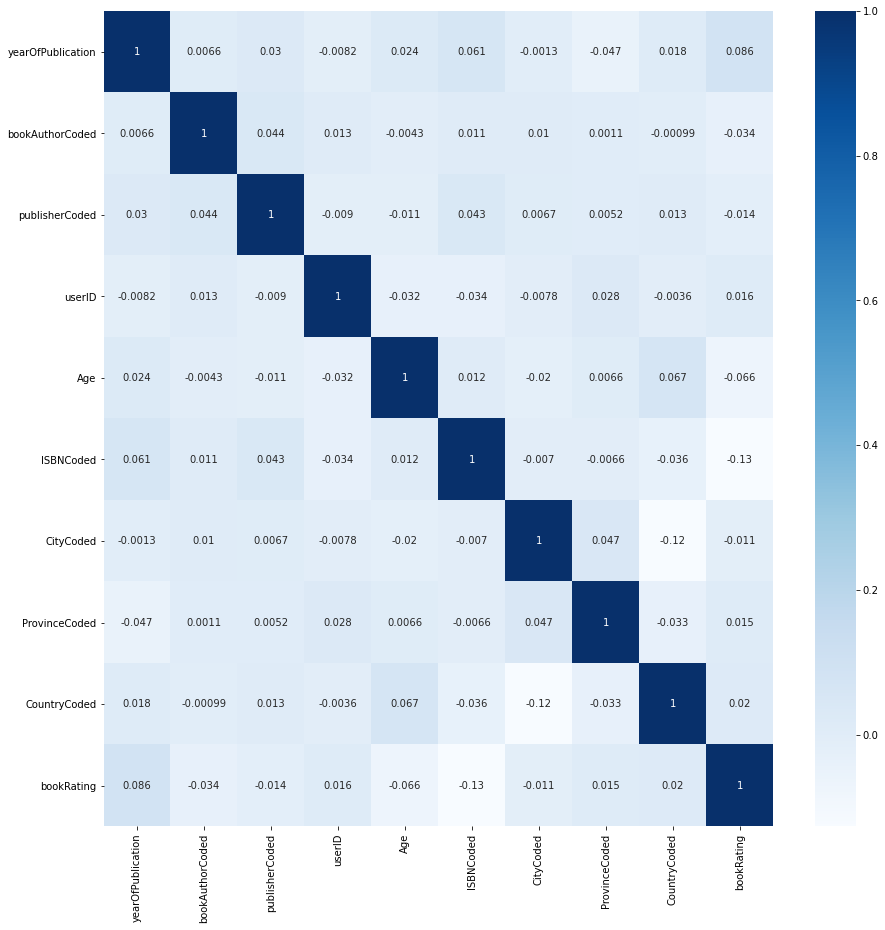

In [73]:
# Finding parameter correlations
fig, ax = plt.subplots(figsize=(15, 15))
corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap='Blues')

In [74]:
# Scaling data
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns, index=df.index)

# KMeans

In [75]:
# finding optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)

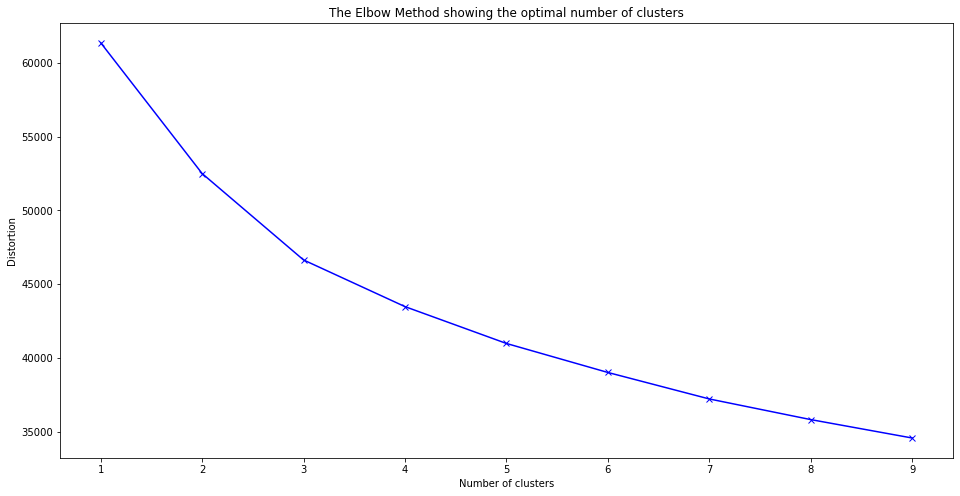

In [76]:
# Ploting Elbow Method in order to find optimal k
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

In [77]:
kmeanModel = KMeans(n_clusters = 3)
kmeanModel.fit(df_scaled)

KMeans(n_clusters=3)

In [78]:
clust_labels = kmeanModel.predict(df_scaled)
centers = kmeanModel.cluster_centers_

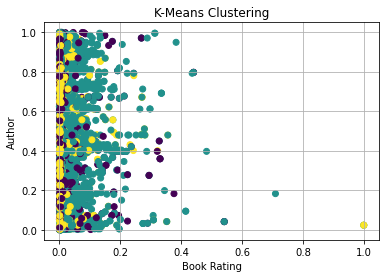

In [79]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df_scaled['bookRating'][:15000], df_scaled['bookAuthorCoded'][:15000], c=pd.DataFrame(kmeanModel.predict(df_scaled))[:15000])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book Rating' )
ax.set_ylabel('Author')
ax.grid(True)

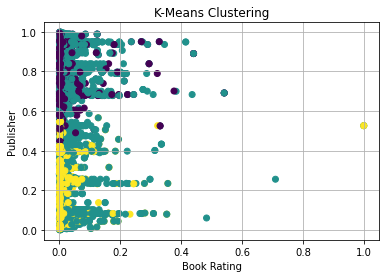

In [80]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df_scaled['bookRating'][:15000], df_scaled['publisherCoded'][:15000], c=pd.DataFrame(kmeanModel.predict(df_scaled))[:15000])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book Rating' )
ax.set_ylabel('Publisher')
ax.grid(True)

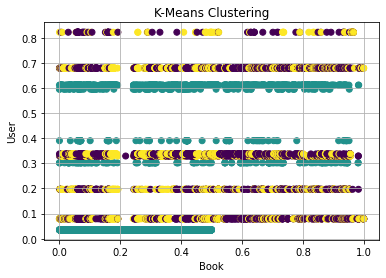

In [81]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df_scaled['ISBNCoded'][:10000], df_scaled['userID'][:10000], c=pd.DataFrame(kmeanModel.predict(df_scaled))[:10000])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book')
ax.set_ylabel('User')
ax.grid(True)

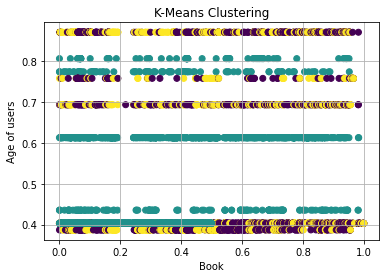

In [82]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df_scaled['ISBNCoded'][:10000], df_scaled['Age'][:10000], c=pd.DataFrame(kmeanModel.predict(df_scaled))[:10000])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book')
ax.set_ylabel('Age of users')
ax.grid(True)

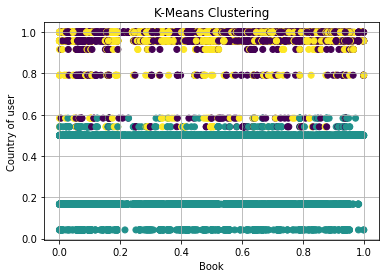

In [83]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df_scaled['ISBNCoded'][:20000], df_scaled['CountryCoded'][:20000], c=pd.DataFrame(kmeanModel.predict(df_scaled))[:20000])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book')
ax.set_ylabel('Country of user')
ax.grid(True)

Text(0.5, 0, 'Country')

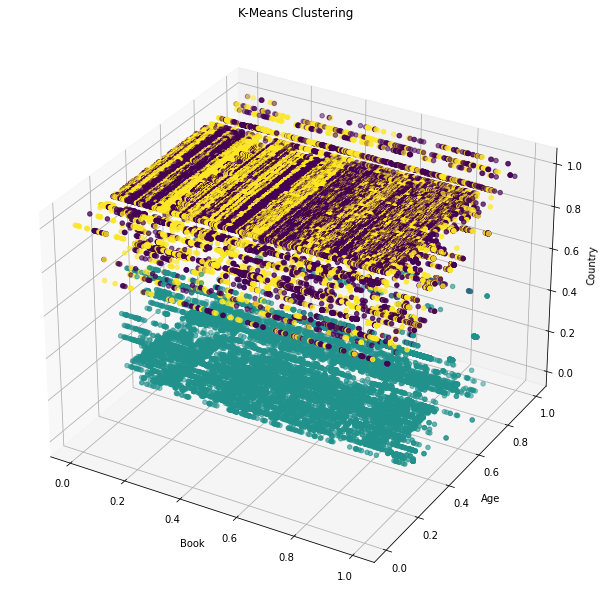

In [84]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(df_scaled['ISBNCoded'], df_scaled['Age'], df_scaled['CountryCoded'], c=pd.DataFrame(kmeanModel.predict(df_scaled)))
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book')
ax.set_ylabel('Age')
ax.set_zlabel('Country')

In [113]:
print('Kmeans clustering - Silhouette score - Euclidian metric: {}'.format(silhouette_score(df_scaled, kmeanModel.labels_, metric='euclidean')))
print('Kmeans clustering - Silhouette score - Cosine metric: {}'.format(silhouette_score(df_scaled, kmeanModel.labels_, metric='cosine')))

Kmeans clustering - Silhouette score - Euclidian metric: 0.14116080571846543
Kmeans clustering - Silhouette score - Cosine metric: 0.2115852177793393


# Agglomerative Clustering

In [85]:
df_scaled.shape

(103274, 10)

In [87]:
small_df = df_scaled[:10000]

In [88]:
small_df.shape

(10000, 10)

In [91]:
K = range(2,10)
silhouette_scores = []
for k in K:
    aggl = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(small_df)
    silhouette_scores.append(silhouette_score(small_df, aggl.labels_, metric = "euclidean"))

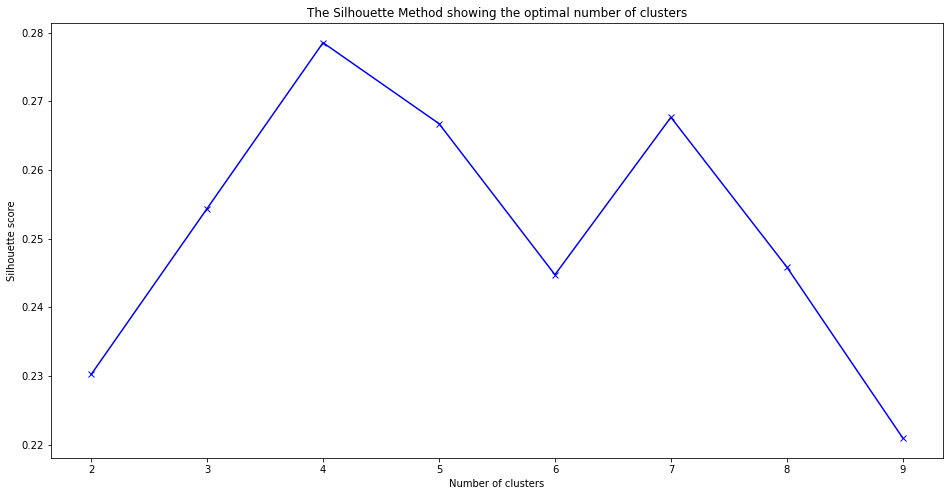

In [92]:
# Ploting Silhouette Method in order to find optimal number of clusters
plt.figure(figsize=(16,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('The Silhouette Method showing the optimal number of clusters')
plt.show()

In [93]:
agglModel = AgglomerativeClustering(n_clusters=4)
agglModel.fit(small_df)

AgglomerativeClustering(n_clusters=4)

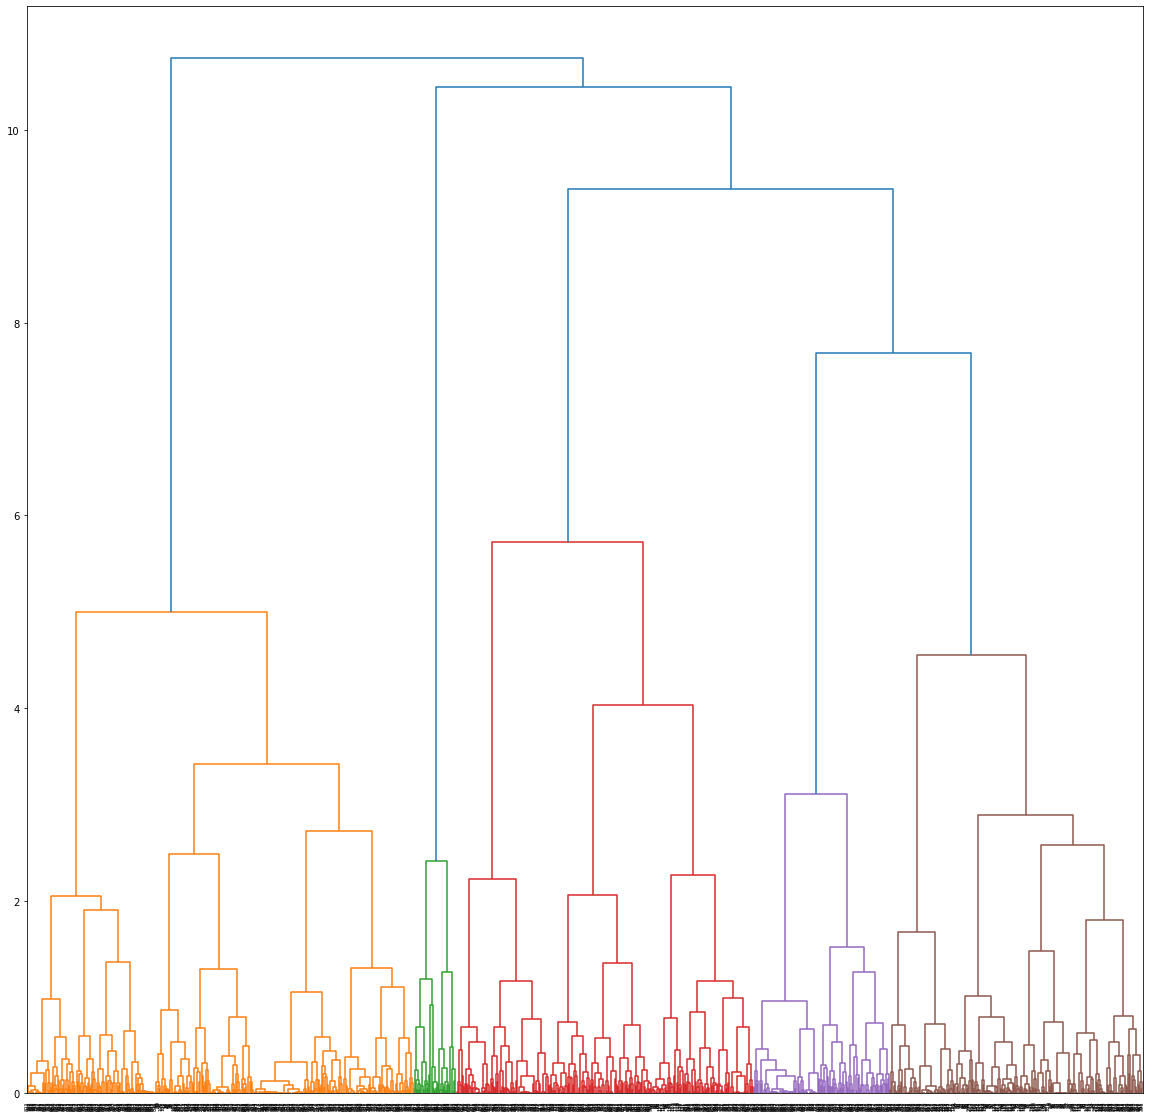

In [97]:
plt.figure(figsize=(20,20))
sch.dendrogram(sch.linkage(small_df[:1000], method = "ward"))
plt.show()

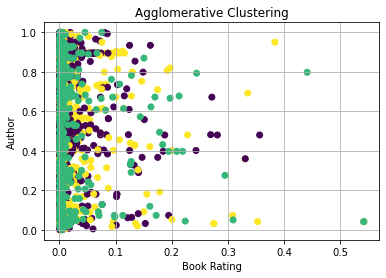

In [103]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(small_df['bookRating'][:5000], small_df['bookAuthorCoded'][:5000], c=pd.DataFrame(agglModel.fit_predict(small_df))[:5000])
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Book Rating' )
ax.set_ylabel('Author')
ax.grid(True)

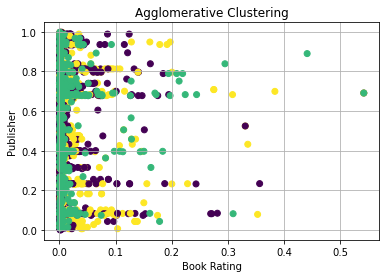

In [105]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(small_df['bookRating'][:5000], small_df['publisherCoded'][:5000], c=pd.DataFrame(agglModel.fit_predict(small_df))[:5000])
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Book Rating' )
ax.set_ylabel('Publisher')
ax.grid(True)

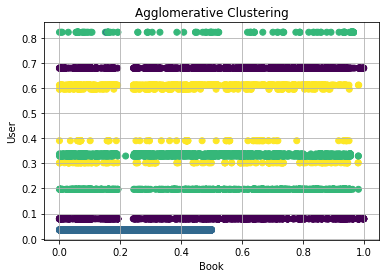

In [107]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(small_df['ISBNCoded'], small_df['userID'], c=pd.DataFrame(agglModel.fit_predict(small_df)))
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Book' )
ax.set_ylabel('User')
ax.grid(True)

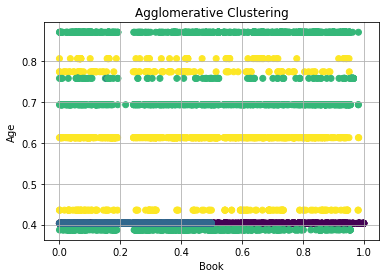

In [108]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(small_df['ISBNCoded'], small_df['Age'], c=pd.DataFrame(agglModel.fit_predict(small_df)))
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Book' )
ax.set_ylabel('Age')
ax.grid(True)

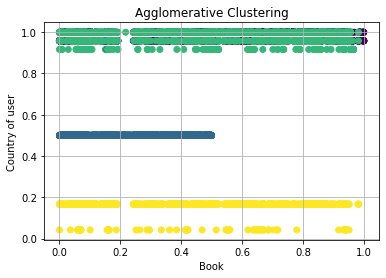

In [109]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(small_df['ISBNCoded'], small_df['CountryCoded'], c=pd.DataFrame(agglModel.fit_predict(small_df)))
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Book')
ax.set_ylabel('Country of user')
ax.grid(True)

Text(0.5, 0, 'Country')

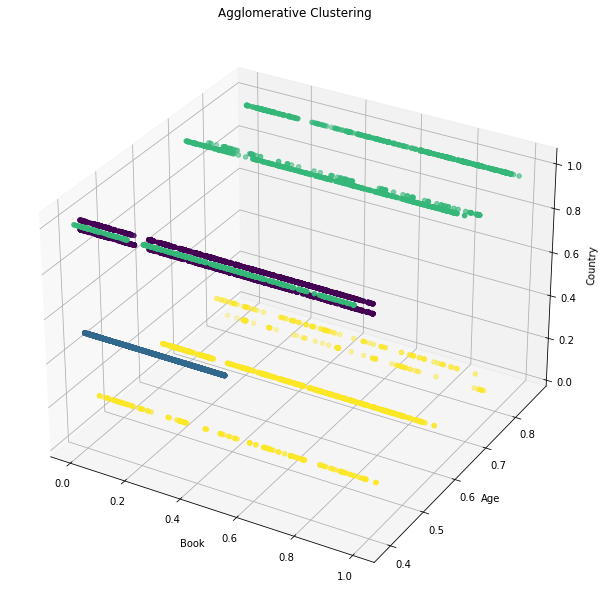

In [111]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(small_df['ISBNCoded'], small_df['Age'], small_df['CountryCoded'], c=pd.DataFrame(agglModel.fit_predict(small_df)))
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Book')
ax.set_ylabel('Age')
ax.set_zlabel('Country')

In [114]:
print('Agglomerative Clustering - Silhouette score - Euclidean metric: {}'.format(silhouette_score(small_df, agglModel.labels_, metric='euclidean')))
print('Agglomerative Clustering - Silhouette score - Cosine metric: {}'.format(silhouette_score(small_df, agglModel.labels_, metric='cosine')))

Agglomerative Clustering - Silhouette score - Euclidean metric: 0.27852297102598156
Agglomerative Clustering - Silhouette score - Cosine metric: 0.38018807796589815
